# Продвинутая визуализация с Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык продвинутой визуализации и форматирования данных с помощью matplotlib. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

При построении графиков необходимо использовать объектно-ориентированный подход (задание графика через объекты Figure и Axes) везде, где это возможно. У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

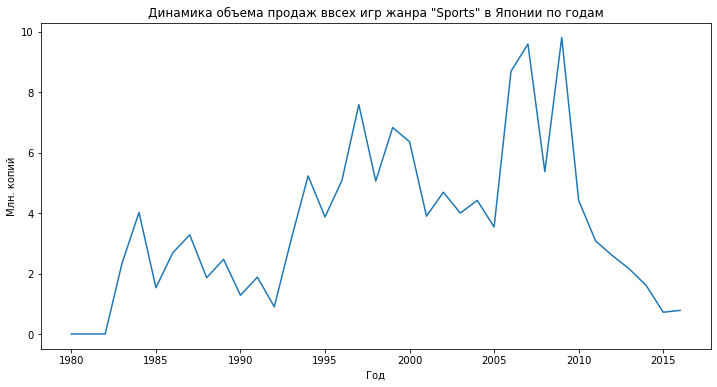

In [15]:
### YOUR CODE HERE ###
data = df[df['Genre'] == 'Sports'].groupby('Year')['JP_Sales'].sum()

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data)

ax.set_title('Динамика объема продаж ввсех игр жанра "Sports" в Японии по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Млн. копий')

plt.show()

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

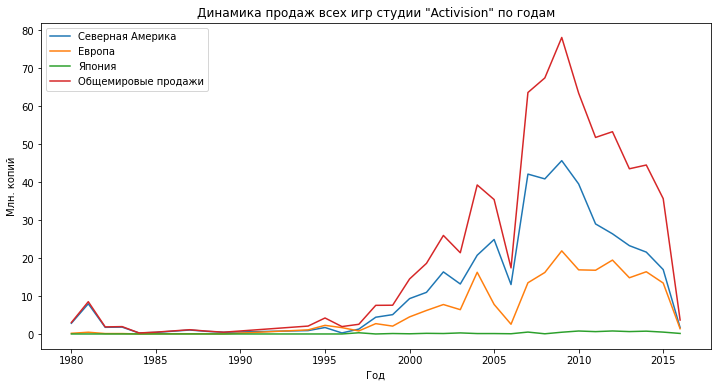

In [29]:
### YOUR CODE HERE ###
data = df[df['Publisher'] == 'Activision'].groupby('Year')['NA_Sales'].sum()
data1 = df[df['Publisher'] == 'Activision'].groupby('Year')['EU_Sales'].sum()
data2 = df[df['Publisher'] == 'Activision'].groupby('Year')['JP_Sales'].sum()
data3 = df[df['Publisher'] == 'Activision'].groupby('Year')['Global_Sales'].sum()

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data, label = 'Северная Америка')
ax.plot(data1, label = 'Европа')
ax.plot(data2, label = 'Япония')
ax.plot(data3, label = 'Общемировые продажи')

ax.set_title('Динамика продаж всех игр студии "Activision" по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Млн. копий')
ax.legend()

plt.show()

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

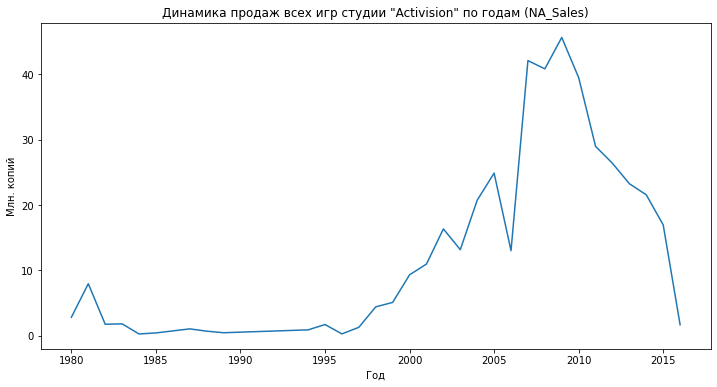

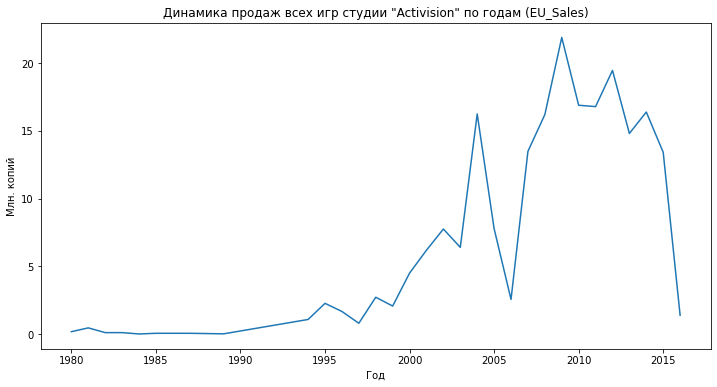

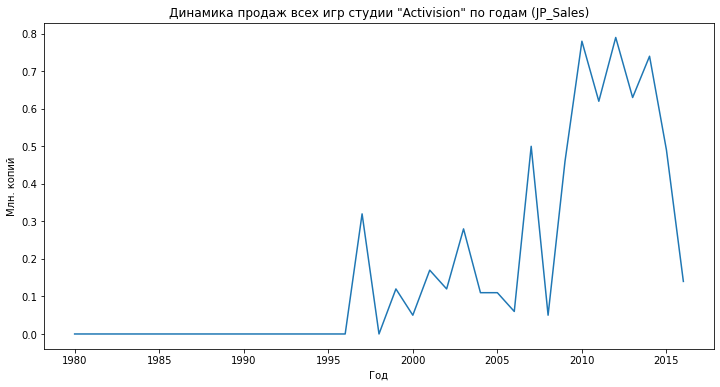

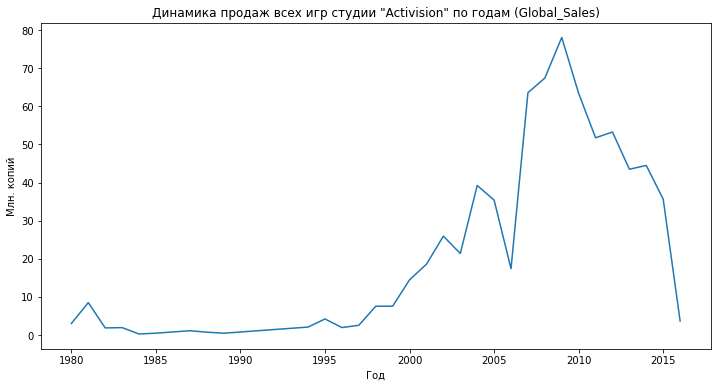

In [31]:
### YOUR CODE HERE ###
for column in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']:
    data = df[df['Publisher'] == 'Activision'].groupby('Year')[column].sum()
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(data)
    
    ax.set_title('Динамика продаж всех игр студии "Activision" по годам ({0})'.format(column))
    ax.set_xlabel('Год')
    ax.set_ylabel('Млн. копий')

### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

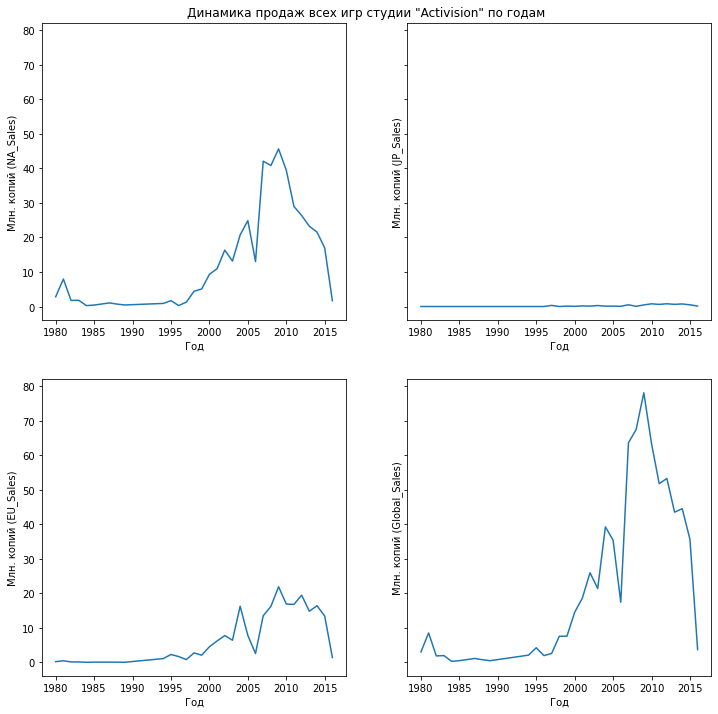

In [81]:
### YOUR CODE HERE ###
fig, axs = plt.subplots(figsize=(12,12), nrows = 2, ncols = 2, sharey=True)
column = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
c = 0

fig.suptitle('Динамика продаж всех игр студии "Activision" по годам', y=0.90)

for i in range(2):
    for j in range(2):
        data = df[df['Publisher'] == 'Activision'].groupby('Year')[column[c]].sum()

        ax = axs[j][i]
        ax.plot(data)

        ax.set_xlabel('Год')
        ax.set_ylabel('Млн. копий ({0})'.format(column[c]))
        c += 1